# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [2]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')

In [3]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [4]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [5]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [6]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [7]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [8]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0,Literacy_Language,ESL Literacy,My students are English learners that are work...
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1,History_Civics Health_Sports,Civics_Government TeamSports,Our students arrive to our school eager to lea...


In [9]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [10]:
#to drop a row having nan https://stackoverflow.com/questions/13413590
project_data=project_data.dropna(subset=['teacher_prefix'])

In [11]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

My students are English learners that are working on English as their second or third languages. We are a melting pot of refugees, immigrants, and native-born Americans bringing the gift of language to our school. \r\n\r\n We have over 24 languages represented in our English Learner program with students at every level of mastery.  We also have over 40 countries represented with the families within our school.  Each student brings a wealth of knowledge and experiences to us that open our eyes to new cultures, beliefs, and respect.\"The limits of your language are the limits of your world.\"-Ludwig Wittgenstein  Our English learner's have a strong support system at home that begs for more resources.  Many times our parents are learning to read and speak English along side of their children.  Sometimes this creates barriers for parents to be able to help their child learn phonetics, letter recognition, and other reading skills.\r\n\r\nBy providing these dvd's and players, students are ab

In [12]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [13]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

My wonderful students are 3, 4, and 5 years old.  We are located in a small town outside of Charlotte, NC.  All of my 22 students are children of school district employees.\r\nMy students are bright, energetic, and they love to learn!  They love hands-on activities that get them moving.  Like most preschoolers, they enjoy music and creating different things. \r\nAll of my students come from wonderful families that are very supportive of our classroom.  Our parents enjoy watching their children is growth as much as we do!These materials will help me teach my students all about the life cycle of a butterfly.  We will watch as the Painted Lady caterpillars grow bigger and build their chrysalis.  After a few weeks they will emerge from the chrysalis as beautiful butterflies!  We already have a net for the chrysalises, but we still need the caterpillars and feeding station.\r\nThis will be an unforgettable experience for my students.  My student absolutely love hands-on materials.  They lea

In [14]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My wonderful students are 3, 4, and 5 years old.  We are located in a small town outside of Charlotte, NC.  All of my 22 students are children of school district employees.  My students are bright, energetic, and they love to learn!  They love hands-on activities that get them moving.  Like most preschoolers, they enjoy music and creating different things.   All of my students come from wonderful families that are very supportive of our classroom.  Our parents enjoy watching their children is growth as much as we do!These materials will help me teach my students all about the life cycle of a butterfly.  We will watch as the Painted Lady caterpillars grow bigger and build their chrysalis.  After a few weeks they will emerge from the chrysalis as beautiful butterflies!  We already have a net for the chrysalises, but we still need the caterpillars and feeding station.  This will be an unforgettable experience for my students.  My student absolutely love hands-on materials.  They learn so 

In [15]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My wonderful students are 3 4 and 5 years old We are located in a small town outside of Charlotte NC All of my 22 students are children of school district employees My students are bright energetic and they love to learn They love hands on activities that get them moving Like most preschoolers they enjoy music and creating different things All of my students come from wonderful families that are very supportive of our classroom Our parents enjoy watching their children is growth as much as we do These materials will help me teach my students all about the life cycle of a butterfly We will watch as the Painted Lady caterpillars grow bigger and build their chrysalis After a few weeks they will emerge from the chrysalis as beautiful butterflies We already have a net for the chrysalises but we still need the caterpillars and feeding station This will be an unforgettable experience for my students My student absolutely love hands on materials They learn so much from getting to touch and man

In [16]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [17]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|██████████| 109245/109245 [01:10<00:00, 1539.64it/s]


In [18]:
# after preprocesing
preprocessed_essays[20000]

'my wonderful students 3 4 5 years old we located small town outside charlotte nc all 22 students children school district employees my students bright energetic love learn they love hands activities get moving like preschoolers enjoy music creating different things all students come wonderful families supportive classroom our parents enjoy watching children growth much these materials help teach students life cycle butterfly we watch painted lady caterpillars grow bigger build chrysalis after weeks emerge chrysalis beautiful butterflies we already net chrysalises still need caterpillars feeding station this unforgettable experience students my student absolutely love hands materials they learn much getting touch manipulate different things the supporting materials i selected help students understand life cycle exploration nannan'

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [19]:
# similarly you can preprocess the titles also

In [20]:
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_titles.append(sent.lower().strip())

100%|██████████| 109245/109245 [00:03<00:00, 35891.16it/s]


In [21]:
# after preprocesing
preprocessed_titles[10000]

'becoming readerly readers'

## 1.5 Preparing data for models

In [22]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category', 'project_title',
       'project_essay_1', 'project_essay_2', 'project_essay_3',
       'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved',
       'clean_categories', 'clean_subcategories', 'essay'],
      dtype='object')

we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

### 1.5.1 Vectorizing Categorical data

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [23]:
# we use count vectorizer to convert the values into one 
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
categories_one_hot = vectorizer.fit_transform(project_data['clean_categories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",categories_one_hot.shape)

['Care_Hunger', 'Literacy_Language', 'SpecialNeeds', 'History_Civics', 'Warmth', 'Health_Sports', 'AppliedLearning', 'Music_Arts', 'Math_Science']
Shape of matrix after one hot encodig  (109245, 9)


In [24]:
# we use count vectorizer to convert the values into one 
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
sub_categories_one_hot = vectorizer.fit_transform(project_data['clean_subcategories'].values)
print(vectorizer.get_feature_names())
print("Shape of matrix after one hot encodig ",sub_categories_one_hot.shape)

['CharacterEducation', 'SocialSciences', 'NutritionEducation', 'History_Geography', 'TeamSports', 'Extracurricular', 'Care_Hunger', 'Civics_Government', 'Music', 'Economics', 'ForeignLanguages', 'PerformingArts', 'EarlyDevelopment', 'Health_LifeScience', 'Other', 'VisualArts', 'FinancialLiteracy', 'College_CareerPrep', 'CommunityService', 'ParentInvolvement', 'EnvironmentalScience', 'AppliedSciences', 'Mathematics', 'Warmth', 'Health_Wellness', 'ESL', 'Literacy', 'Literature_Writing', 'SpecialNeeds', 'Gym_Fitness']
Shape of matrix after one hot encodig  (109245, 30)


In [25]:
#Vectorizing Categorical data:State

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in project_data['school_state'].values:
    my_counter.update(word.split())
    
    
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
state_dict = dict(my_counter)
sorted_state_dict = dict(sorted(state_dict.items(), key=lambda kv: kv[1]))

# we use count vectorizer to convert the values into one hot encoded features
from sklearn.feature_extraction.text import CountVectorizer
vectorizer1 = CountVectorizer(vocabulary=list(sorted_state_dict.keys()), lowercase=False, binary=True)
vectorizer1.fit(project_data['school_state'].values)
print(vectorizer1.get_feature_names())


state_one_hot = vectorizer1.transform(project_data['school_state'].values)

print("Shape of matrix after one hot encodig ",state_one_hot.shape)

['DE', 'AK', 'GA', 'ID', 'CO', 'CA', 'NV', 'ND', 'FL', 'VT', 'MD', 'NY', 'SD', 'WY', 'AR', 'MN', 'KY', 'TN', 'NH', 'WI', 'OH', 'RI', 'WV', 'WA', 'SC', 'MS', 'MT', 'DC', 'MI', 'OR', 'ME', 'KS', 'PA', 'TX', 'NC', 'NM', 'NE', 'NJ', 'IA', 'AZ', 'AL', 'IL', 'UT', 'LA', 'IN', 'CT', 'MO', 'MA', 'VA', 'OK', 'HI']
Shape of matrix after one hot encodig  (109245, 51)


In [26]:
#Vectorizing Categorical data:teacher_prefix

def partition(i):
    return i.replace('.', '')

prefix = project_data['teacher_prefix']
actual_prefix = prefix.map(partition)
project_data['teacher_prefix'] = actual_prefix

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
my_counter.update(project_data['teacher_prefix'])
        
#dict sort by value python: https://stackoverflow.com/a/613218/4084039
teacher_dict = dict(my_counter)
sorted_teacher_dict = dict(sorted(teacher_dict.items(), key=lambda kv: kv[1]))

#we use count vectorizer to convert the values into one hot encoded features

vectorizer1 = CountVectorizer(vocabulary=list(sorted_teacher_dict.keys()), lowercase=False, binary=True)
vectorizer1.fit(project_data['teacher_prefix'].values)
print(vectorizer1.get_feature_names())


prefix_one_hot = vectorizer1.transform(project_data['teacher_prefix'].values)

print("Shape of matrix after one hot encodig ",prefix_one_hot.shape)

['Ms', 'Teacher', 'Dr', 'Mrs', 'Mr']
Shape of matrix after one hot encodig  (109245, 5)


In [27]:
#Vectorizing Categorical data:project_grade_category

def partition(i):
    return i.replace('-', '_')

prefix = project_data['project_grade_category']
actual_prefix = prefix.map(partition)
project_data['project_grade_category'] = actual_prefix

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['project_grade_category'].values:
    my_counter.update(word.split())
    
    
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
grade_dict = dict(my_counter)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))

#https://thispointer.com/different-ways-to-remove-a-key-from-dictionary-in-python/
if "Grades" in sorted_grade_dict:
    del sorted_grade_dict["Grades"]

# we use count vectorizer to convert the values into one hot encoded features
vectorizer3 = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vectorizer3.fit(project_data['project_grade_category'].values)
print(vectorizer3.get_feature_names())


grade_one_hot = vectorizer3.transform(project_data['project_grade_category'].values)
print("Shape of matrix after one hot encodig ",grade_one_hot.shape)

['3_5', 'PreK_2', '9_12', '6_8']
Shape of matrix after one hot encodig  (109245, 4)


### 1.5.2 Vectorizing Text data

#### 1.5.2.1 Bag of words

In [28]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
text_bow = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_bow.shape)

Shape of matrix after one hot encodig  (109245, 16623)


In [29]:
#Bag of Words on project_title
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
title_bow = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",title_bow.shape)

Shape of matrix after one hot encodig  (109245, 3222)


#### 1.5.2.2 TFIDF vectorizer

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
text_tfidf = vectorizer.fit_transform(preprocessed_essays)
print("Shape of matrix after one hot encodig ",text_tfidf.shape)

Shape of matrix after one hot encodig  (109245, 16623)


#### 1.5.2.3 Using Pretrained Models: Avg W2V

In [31]:
'''
# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039
def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    f = open(gloveFile,'r', encoding="utf8")
    model = {}
    for line in tqdm(f):
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model
model = loadGloveModel('glove.42B.300d.txt')

# ============================
Output:
    
Loading Glove Model
1917495it [06:32, 4879.69it/s]
Done. 1917495  words loaded!

# ============================

words = []
for i in preproced_texts:
    words.extend(i.split(' '))

for i in preproced_titles:
    words.extend(i.split(' '))
print("all the words in the coupus", len(words))
words = set(words)
print("the unique words in the coupus", len(words))

inter_words = set(model.keys()).intersection(words)
print("The number of words that are present in both glove vectors and our coupus", \
      len(inter_words),"(",np.round(len(inter_words)/len(words)*100,3),"%)")

words_courpus = {}
words_glove = set(model.keys())
for i in words:
    if i in words_glove:
        words_courpus[i] = model[i]
print("word 2 vec length", len(words_courpus))


# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

import pickle
with open('glove_vectors', 'wb') as f:
    pickle.dump(words_courpus, f)


'''

'\n# Reading glove vectors in python: https://stackoverflow.com/a/38230349/4084039\ndef loadGloveModel(gloveFile):\n    print ("Loading Glove Model")\n    f = open(gloveFile,\'r\', encoding="utf8")\n    model = {}\n    for line in tqdm(f):\n        splitLine = line.split()\n        word = splitLine[0]\n        embedding = np.array([float(val) for val in splitLine[1:]])\n        model[word] = embedding\n    print ("Done.",len(model)," words loaded!")\n    return model\nmodel = loadGloveModel(\'glove.42B.300d.txt\')\n\n# ============================\nOutput:\n    \nLoading Glove Model\n1917495it [06:32, 4879.69it/s]\nDone. 1917495  words loaded!\n\n# ============================\n\nwords = []\nfor i in preproced_texts:\n    words.extend(i.split(\' \'))\n\nfor i in preproced_titles:\n    words.extend(i.split(\' \'))\nprint("all the words in the coupus", len(words))\nwords = set(words)\nprint("the unique words in the coupus", len(words))\n\ninter_words = set(model.keys()).intersection(word

In [32]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [33]:
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors.append(vector)

print(len(avg_w2v_vectors))
print(len(avg_w2v_vectors[0]))

100%|██████████| 109245/109245 [00:36<00:00, 2969.83it/s]

109245
300


#### 1.5.2.3 Using Pretrained Models: TFIDF weighted W2V

In [34]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

In [35]:
# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors.append(vector)

print(len(tfidf_w2v_vectors))
print(len(tfidf_w2v_vectors[0]))

100%|██████████| 109245/109245 [03:51<00:00, 472.21it/s]

109245
300


In [36]:
#TFIDF Vectorizer on project_title
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
title_tfidf = vectorizer.fit_transform(preprocessed_titles)
print("Shape of matrix after one hot encodig ",title_tfidf.shape)

Shape of matrix after one hot encodig  (109245, 3222)


In [37]:
#Using Pretrained Models: AVG W2V on project_title

# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())
    
# average Word2Vec
# compute average word2vec for each review.
avg_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_title.append(vector)

print(len(avg_w2v_vectors_title))
print(len(avg_w2v_vectors_title[0]))    

100%|██████████| 109245/109245 [00:01<00:00, 64514.80it/s]

109245
300


In [38]:
#Using Pretrained Models: TFIDF weighted W2V on project_title

# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit(preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words_title = set(tfidf_model.get_feature_names())

# average Word2Vec
# compute average word2vec for each review.
tfidf_w2v_vectors_title = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words_title):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_title.append(vector)

print(len(tfidf_w2v_vectors_title))
print(len(tfidf_w2v_vectors_title[0]))


100%|██████████| 109245/109245 [00:03<00:00, 27660.68it/s]

109245
300


### 1.5.3 Vectorizing Numerical features

In [39]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()
project_data = pd.merge(project_data, price_data, on='id', how='left')

In [40]:
# check this one: https://www.youtube.com/watch?v=0HOqOcln3Z4&t=530s
# standardization sklearn: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
from sklearn.preprocessing import StandardScaler

# price_standardized = standardScalar.fit(project_data['price'].values)
# this will rise the error
# ValueError: Expected 2D array, got 1D array instead: array=[725.05 213.03 329.   ... 399.   287.73   5.5 ].
# Reshape your data either using array.reshape(-1, 1)

price_scalar = StandardScaler()
price_scalar.fit(project_data['price'].values.reshape(-1,1)) # finding the mean and standard deviation of this data
print("Mean :",price_scalar.mean_[0],",Standard deviation :",np.sqrt(price_scalar.var_[0]))

# Now standardize the data with above maen and variance.
price_standardized = price_scalar.transform(project_data['price'].values.reshape(-1, 1))

Mean : 298.1152448166964 ,Standard deviation : 367.49642545627506


In [41]:
price_standardized

array([[-0.39052147],
       [ 0.00240752],
       [ 0.5952024 ],
       ...,
       [-0.1582471 ],
       [-0.61242839],
       [-0.51215531]])

### 1.5.4 Merging all the above features

- we need to merge all the numerical vectors i.e catogorical, text, numerical vectors

In [42]:
print(categories_one_hot.shape)
print(sub_categories_one_hot.shape)
print(text_bow.shape)
print(price_standardized.shape)

(109245, 9)
(109245, 30)
(109245, 16623)
(109245, 1)


In [43]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
# with the same hstack function we are concatinating a sparse matrix and a dense matirx :)
X = hstack((categories_one_hot, sub_categories_one_hot, text_bow, price_standardized))
X.shape

(109245, 16663)

__ Computing Sentiment Scores__

In [44]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#import nltk
#nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neu: 0.745, compound: 0.9975, neg: 0.01, pos: 0.245, 

In [45]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

neg1 = []
neu1 = []
pos1 = []
compound1 = []

sid = SentimentIntensityAnalyzer()

for index, row in project_data.iterrows():
    for_sentiment = row['essay']
    ss = sid.polarity_scores(for_sentiment)
    for k in ss:
        if('neg'==k):
            neg1.append(ss[k])
        if(k=='neu'):
            neu1.append(ss[k])
        if(k=='pos'):
            pos1.append(ss[k])
        if(k=='compound'):
            compound1.append(ss[k])


In [46]:
project_data['neg'] = neg1
project_data['neu'] = neu1
project_data['pos'] = pos1
project_data['compound'] = compound1

In [47]:
# using split() 
# to count words in string 
no_of_words = []
for index, row in project_data.iterrows():
    words = row['essay']
    res = len(words.split())
    no_of_words.append(res)
    
project_data['no_of_words_in_essay'] = no_of_words

In [48]:
no_of_words = []
for index, row in project_data.iterrows():
    words = row['project_title']
    res = len(words.split())
    no_of_words.append(res)
    
project_data['no_of_words_in_title'] = no_of_words

# Assignment 7: SVM

<ol>
    <li><strong>[Task-1] Apply Support Vector Machines(SGDClassifier with hinge loss: Linear SVM) on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical, numerical features + project_title(BOW) + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)</li>
            <li><font color='red'>Set 3</font>: categorical, numerical features + project_title(AVG W2V)+  preprocessed_eassay (AVG W2V)</li>
            <li><font color='red'>Set 4</font>: categorical, numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <br>
    <li><strong>The hyper paramter tuning (best alpha in range [10^-4 to 10^4], and the best penalty among 'l1', 'l2')</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>Find the best hyper paramter using k-fold cross validation or simple cross validation data</li>
    <li>Use gridsearch cv or randomsearch cv or you can also write your own for loops to do this task of hyperparameter tuning
        </ul>
            </li>
    <br>
    <li><strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure.
    <img src='train_cv_auc.JPG' width=300px></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='train_test_auc.JPG' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points. Please visualize your confusion matrices using <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heatmaps.
    <img src='confusion_matrix.png' width=300px></li>
        </ul>
    </li>
    <br>
    <li><strong>[Task-2] Apply the Support Vector Machines on these features by finding the best hyper paramter as suggested in step 2 and step 3</strong>
        <ul>
    <li> Consider these set of features <font color='red'> Set 5 :</font>
            <ul>
                <li><strong>school_state</strong> : categorical data</li>
                <li><strong>clean_categories</strong> : categorical data</li>
                <li><strong>clean_subcategories</strong> : categorical data</li>
                <li><strong>project_grade_category</strong> :categorical data</li>
                <li><strong>teacher_prefix</strong> : categorical data</li>
                <li><strong>quantity</strong> : numerical data</li>
                <li><strong>teacher_number_of_previously_posted_projects</strong> : numerical data</li>
                <li><strong>price</strong> : numerical data</li>
                <li><strong>sentiment score's of each of the essay</strong> : numerical data</li>
                <li><strong>number of words in the title</strong> : numerical data</li>
                <li><strong>number of words in the combine essays</strong> : numerical data</li>
                <li><strong>Apply <a href='http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html'>TruncatedSVD</a> on <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfidfVectorizer</a> of essay text, choose the number of components (`n_components`) using <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/pca-code-example-using-non-visualization/'>elbow method</a></strong> : numerical data</li>
            </ul>
         <br>
    </li>
    <br>
    <li><strong>Conclusion</strong>
        <ul>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format. To print out a table please refer to this prettytable library<a href='http://zetcode.com/python/prettytable/'>  link</a> 
        <img src='summary.JPG' width=400px>
    </li>
        </ul>
</ol>

<h4><font color='red'>Note: Data Leakage</font></h4>

1. There will be an issue of data-leakage if you vectorize the entire data and then split it into train/cv/test.
2. To avoid the issue of data-leakage, make sure to split your data first and then vectorize it. 
3. While vectorizing your data, apply the method fit_transform() on you train data, and apply the method transform() on cv/test data.
4. For more details please go through this <a href='https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf'>link.</a>

<h1>2. Support Vector Machines </h1>

<h2>2.1 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [49]:
project_data1 = project_data
project_data1.head(3)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,clean_subcategories,essay,quantity,price,neg,neu,pos,compound,no_of_words_in_essay,no_of_words_in_title
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs,IN,2016-12-05 13:43:57,Grades PreK_2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",...,ESL Literacy,My students are English learners that are work...,23,154.60,0.008,0.911,0.081,0.9611,272,7
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr,FL,2016-10-25 09:22:10,Grades 6_8,Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,...,Civics_Government TeamSports,Our students arrive to our school eager to lea...,1,299.00,0.037,0.851,0.112,0.9267,221,5
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms,AZ,2016-08-31 12:03:56,Grades 6_8,Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,...,Health_Wellness TeamSports,"\r\n\""True champions aren't always the ones th...",22,516.85,0.058,0.764,0.179,0.9950,361,7


In [50]:
y = project_data1['project_is_approved'].values
project_data1.drop(['project_is_approved'], axis=1, inplace=True)
project_data1.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_title,project_essay_1,project_essay_2,...,clean_subcategories,essay,quantity,price,neg,neu,pos,compound,no_of_words_in_essay,no_of_words_in_title
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs,IN,2016-12-05 13:43:57,Grades PreK_2,Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",...,ESL Literacy,My students are English learners that are work...,23,154.6,0.008,0.911,0.081,0.9611,272,7


In [51]:
X = project_data1
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)

<h2>2.2 Make Data Model Ready: encoding numerical, categorical features</h2>

<h3>2.2.1 Normalizing the numerical features: Price</h3>

In [52]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73194, 1) (73194,)
(36051, 1) (36051,)


<h3>2.2.2 Normalizing the numerical features: teacher_number_of_previously_posted_projects</h3>

In [53]:
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_tnppp_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_tnppp_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_tnppp_norm.shape, y_train.shape)
print(X_test_tnppp_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73194, 1) (73194,)
(36051, 1) (36051,)


<h3>2.2.3 Normalizing the numerical features: quantity</h3>

In [54]:
normalizer.fit(X_train['quantity'].values.reshape(-1,1))

X_train_quantity_norm = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)
print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73194, 1) (73194,)
(36051, 1) (36051,)


<h3>2.2.4 Normalizing the numerical features: sentiment score's</h3>

In [55]:
normalizer.fit(X_train['neg'].values.reshape(-1,1))

X_train_neg_norm = normalizer.transform(X_train['neg'].values.reshape(-1,1))
X_test_neg_norm = normalizer.transform(X_test['neg'].values.reshape(-1,1))

normalizer.fit(X_train['neu'].values.reshape(-1,1))

X_train_neu_norm = normalizer.transform(X_train['neu'].values.reshape(-1,1))
X_test_neu_norm = normalizer.transform(X_test['neu'].values.reshape(-1,1))

normalizer.fit(X_train['pos'].values.reshape(-1,1))

X_train_pos_norm = normalizer.transform(X_train['pos'].values.reshape(-1,1))
X_test_pos_norm = normalizer.transform(X_test['pos'].values.reshape(-1,1))

normalizer.fit(X_train['compound'].values.reshape(-1,1))

X_train_compound_norm = normalizer.transform(X_train['compound'].values.reshape(-1,1))
X_test_compound_norm = normalizer.transform(X_test['compound'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_neg_norm.shape, y_train.shape)
print(X_test_neg_norm.shape, y_test.shape)
print("="*100)
print(X_train_neu_norm.shape, y_train.shape)
print(X_test_neu_norm.shape, y_test.shape)
print("="*100)
print(X_train_pos_norm.shape, y_train.shape)
print(X_test_pos_norm.shape, y_test.shape)
print("="*100)
print(X_train_compound_norm.shape, y_train.shape)
print(X_test_compound_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73194, 1) (73194,)
(36051, 1) (36051,)
(73194, 1) (73194,)
(36051, 1) (36051,)
(73194, 1) (73194,)
(36051, 1) (36051,)
(73194, 1) (73194,)
(36051, 1) (36051,)


<h3>2.2.5 Normalizing the numerical features: no_of_words_in_title</h3>

In [56]:
normalizer.fit(X_train['no_of_words_in_title'].values.reshape(-1,1))

X_train_no_of_words_in_title_norm = normalizer.transform(X_train['no_of_words_in_title'].values.reshape(-1,1))
X_test_no_of_words_in_title_norm = normalizer.transform(X_test['no_of_words_in_title'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_no_of_words_in_title_norm.shape, y_train.shape)
print(X_test_no_of_words_in_title_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73194, 1) (73194,)
(36051, 1) (36051,)


<h3>2.2.6 Normalizing the numerical features: no_of_words_in_essay</h3>

In [57]:
normalizer.fit(X_train['no_of_words_in_essay'].values.reshape(-1,1))

X_train_no_of_words_in_essay_norm = normalizer.transform(X_train['no_of_words_in_essay'].values.reshape(-1,1))
X_test_no_of_words_in_essay_norm = normalizer.transform(X_test['no_of_words_in_essay'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_no_of_words_in_essay_norm.shape, y_train.shape)
print(X_test_no_of_words_in_essay_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(73194, 1) (73194,)
(36051, 1) (36051,)


<h3>2.2.7 one hot encoding the catogorical features:clean_categories</h3>

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_categories'].values)

X_train_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_test_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)
print("After vectorizations")
print(X_train_categories_ohe.shape, y_train.shape)
print(X_test_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73194, 9) (73194,)
(36051, 9) (36051,)
['Care_Hunger', 'Literacy_Language', 'SpecialNeeds', 'History_Civics', 'Warmth', 'Health_Sports', 'AppliedLearning', 'Music_Arts', 'Math_Science']


<h3>2.2.8 one hot encoding the catogorical features: clean_subcategories</h3>

In [59]:
vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['clean_subcategories'].values)
X_train_sub_categories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_sub_categories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)
print("After vectorizations")
print(X_train_sub_categories_ohe.shape, y_train.shape)
print(X_test_sub_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73194, 30) (73194,)
(36051, 30) (36051,)
['CharacterEducation', 'SocialSciences', 'NutritionEducation', 'History_Geography', 'TeamSports', 'Extracurricular', 'Care_Hunger', 'Civics_Government', 'Music', 'Economics', 'ForeignLanguages', 'PerformingArts', 'EarlyDevelopment', 'Health_LifeScience', 'Other', 'VisualArts', 'FinancialLiteracy', 'College_CareerPrep', 'CommunityService', 'ParentInvolvement', 'EnvironmentalScience', 'AppliedSciences', 'Mathematics', 'Warmth', 'Health_Wellness', 'ESL', 'Literacy', 'Literature_Writing', 'SpecialNeeds', 'Gym_Fitness']


<h3>2.2.9 one hot encoding the catogorical features: school_state</h3>

In [60]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73194, 51) (73194,)
(36051, 51) (36051,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


<h3>2.2.10 one hot encoding the catogorical features: teacher_prefix</h3>

In [61]:
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73194, 5) (73194,)
(36051, 5) (36051,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


<h3>2.2.11 one hot encoding the catogorical features: project_grade_category</h3>

In [62]:
#one hot encoding of project_grade_category for X_train
# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
from collections import Counter
my_counter = Counter()
for word in X_train['project_grade_category'].values:
    my_counter.update(word.split())
    
    
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
grade_dict = dict(my_counter)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))

#https://thispointer.com/different-ways-to-remove-a-key-from-dictionary-in-python/
if "Grades" in sorted_grade_dict:
    del sorted_grade_dict["Grades"]


#Vectorizing Categorical data:project_grade_category

# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_train['project_grade_category'].values)
print(vectorizer.get_feature_names())


X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
print(X_train_grade_ohe.shape, y_train.shape)

['3_5', 'PreK_2', '9_12', '6_8']
(73194, 4) (73194,)


In [63]:
#one hot encoding of project_grade_category for X_test
my_counter = Counter()
for word in X_test['project_grade_category'].values:
    my_counter.update(word.split())
    
    
# dict sort by value python: https://stackoverflow.com/a/613218/4084039
grade_dict = dict(my_counter)
sorted_grade_dict = dict(sorted(grade_dict.items(), key=lambda kv: kv[1]))

#https://thispointer.com/different-ways-to-remove-a-key-from-dictionary-in-python/
if "Grades" in sorted_grade_dict:
    del sorted_grade_dict["Grades"]


#Vectorizing Categorical data:project_grade_category

# we use count vectorizer to convert the values into one hot encoded features
vectorizer = CountVectorizer(vocabulary=list(sorted_grade_dict.keys()), lowercase=False, binary=True)
vectorizer.fit(X_test['project_grade_category'].values)
print(vectorizer3.get_feature_names())


X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)
print(X_test_grade_ohe.shape, y_test.shape)

['3_5', 'PreK_2', '9_12', '6_8']
(36051, 4) (36051,)


In [64]:
print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73194, 4) (73194,)
(36051, 4) (36051,)
['3_5', 'PreK_2', '9_12', '6_8']


In [65]:
print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(73194, 4) (73194,)
(36051, 4) (36051,)
['3_5', 'PreK_2', '9_12', '6_8']


<h2>2.3 Make Data Model Ready: encoding eassay, and project_title</h2>

<h3>2.3.1.1 Text preprocessing</h3>

In [66]:
#text preprocessing on X_train datasets
from tqdm import tqdm
X_train_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    X_train_preprocessed_essays.append(sent.lower().strip())

100%|██████████| 73194/73194 [00:47<00:00, 1540.68it/s]


In [67]:
#text preprocessing on X_test datasets
X_test_preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    X_test_preprocessed_essays.append(sent.lower().strip())

100%|██████████| 36051/36051 [00:23<00:00, 1541.01it/s]


<h3>2.3.1.2 Vectorizing Text data:Bag of words</h3>

In [68]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(ngram_range=(1, 1), min_df=10, max_features=5000)
vectorizer.fit(X_train_preprocessed_essays) # fit has to happen only on train data

X_train_text_bow = vectorizer.transform(X_train_preprocessed_essays)
X_test_text_bow = vectorizer.transform(X_test_preprocessed_essays)

print("After vectorizations")
print(X_train_text_bow.shape, y_train.shape)
print(X_test_text_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(73194, 5000) (73194,)
(36051, 5000) (36051,)


<h3>2.3.1.3 Vectorizing Text data: tfidf</h3>

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 1), min_df=10, max_features=5000)
vectorizer.fit(X_train_preprocessed_essays) # fit has to happen only on train data
X_train_text_tfidf = vectorizer.transform(X_train_preprocessed_essays)
X_test_text_tfidf = vectorizer.transform(X_test_preprocessed_essays)

print("After vectorizations")
print(X_train_text_tfidf.shape, y_train.shape)
print(X_test_text_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(73194, 5000) (73194,)
(36051, 5000) (36051,)


<h3>2.3.1.4 Vectorizing Text data: avg w2v</h3>

In [70]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [71]:
# average Word2Vec for X_train
X_train_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_avg_w2v_vectors.append(vector)

print(len(X_train_avg_w2v_vectors))
print(len(X_train_avg_w2v_vectors[0]))

100%|██████████| 73194/73194 [00:23<00:00, 3137.60it/s]

73194
300


In [72]:
# average Word2Vec for X_test
X_test_avg_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_avg_w2v_vectors.append(vector)

print(len(X_test_avg_w2v_vectors))
print(len(X_test_avg_w2v_vectors[0]))

100%|██████████| 36051/36051 [00:11<00:00, 3145.08it/s]

36051
300


<h3>2.3.1.5 Vectorizing Text data: tfidf weighted w2v</h3>

In [73]:
#tfidf w2v for X_train

# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit_transform(X_train_preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

X_train_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_tfidf_w2v_vectors.append(vector)

print(len(X_train_tfidf_w2v_vectors))
print(len(X_train_tfidf_w2v_vectors[0]))

100%|██████████| 73194/73194 [02:15<00:00, 539.35it/s]

73194
300


In [74]:
#tfidf w2v for X_test

# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model.transform(X_test_preprocessed_essays)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

X_test_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_preprocessed_essays): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_w2v_vectors.append(vector)

print(len(X_test_tfidf_w2v_vectors))
print(len(X_test_tfidf_w2v_vectors[0]))

100%|██████████| 36051/36051 [01:05<00:00, 550.59it/s]

36051
300


<h3>2.3.2.1 Title preprocessing</h3>

In [75]:
#Title preprocessing on X_train datasets
from tqdm import tqdm
X_train_preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    X_train_preprocessed_titles.append(sent.lower().strip())

100%|██████████| 73194/73194 [00:02<00:00, 35544.43it/s]


In [76]:
#title preprocessing on X_test datasets
from tqdm import tqdm
X_test_preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    X_test_preprocessed_titles.append(sent.lower().strip())

100%|██████████| 36051/36051 [00:00<00:00, 36562.68it/s]


<h3>2.3.2.2 Vectorizing project_titles data:Bag of words</h3>

In [77]:
# We are considering only the words which appeared in at least 10 documents(rows or projects).
vectorizer = CountVectorizer(min_df=10)
vectorizer.fit(X_train_preprocessed_titles) # fit has to happen only on train data

X_train_titles_bow = vectorizer.transform(X_train_preprocessed_titles)
X_test_titles_bow = vectorizer.transform(X_test_preprocessed_titles)

print("After vectorizations")
print(X_train_titles_bow.shape, y_train.shape)
print(X_test_titles_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(73194, 2534) (73194,)
(36051, 2534) (36051,)


<h3>2.3.2.3 Vectorizing Text data: tfidf</h3>

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10)
vectorizer.fit(X_train_preprocessed_titles) # fit has to happen only on train data
X_train_titles_tfidf = vectorizer.transform(X_train_preprocessed_titles)
X_test_titles_tfidf = vectorizer.transform(X_test_preprocessed_titles)

print("After vectorizations")
print(X_train_titles_tfidf.shape, y_train.shape)
print(X_test_titles_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(73194, 2534) (73194,)
(36051, 2534) (36051,)


<h3>2.3.2.4 Vectorizing project_title data: avg w2v</h3>

In [79]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [80]:
# average Word2Vec for X_train
X_train_avg_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_train_avg_w2v_vectors_titles.append(vector)

print(len(X_train_avg_w2v_vectors_titles))
print(len(X_train_avg_w2v_vectors_titles[0]))

100%|██████████| 73194/73194 [00:01<00:00, 67429.97it/s]

73194
300


In [81]:
# average Word2Vec for X_test
X_test_avg_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    X_test_avg_w2v_vectors_titles.append(vector)

print(len(X_test_avg_w2v_vectors_titles))
print(len(X_test_avg_w2v_vectors_titles[0]))

100%|██████████| 36051/36051 [00:00<00:00, 63845.95it/s]

36051
300


<h3>2.3.2.5 Vectorizing project_title data: tfidf weighted w2v</h3>

In [82]:
#tfidf w2v for X_train

# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model = TfidfVectorizer()
tfidf_model.fit_transform(X_train_preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

X_train_tfidf_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_tfidf_w2v_vectors_titles.append(vector)

print(len(X_train_tfidf_w2v_vectors_titles))
print(len(X_train_tfidf_w2v_vectors_titles[0]))

100%|██████████| 73194/73194 [00:02<00:00, 27167.44it/s]

73194
300


In [83]:
#tfidf w2v for X_test

# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
tfidf_model.transform(X_test_preprocessed_titles)
# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
tfidf_words = set(tfidf_model.get_feature_names())

X_test_tfidf_w2v_vectors_titles = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_test_preprocessed_titles): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_w2v_vectors_titles.append(vector)

print(len(X_test_tfidf_w2v_vectors_titles))
print(len(X_test_tfidf_w2v_vectors_titles[0]))

100%|██████████| 36051/36051 [00:01<00:00, 28672.00it/s]

36051
300


<h2>2.4 Appling Support Vector Machines on different kind of featurization as mentioned in the instructions</h2>

<br>Apply Support Vector Machines on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

<h3>Concatinating all the features:model1-BOW</h3>

In [84]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr_m1 = hstack((X_train_categories_ohe, X_train_sub_categories_ohe, X_train_teacher_ohe, X_train_state_ohe, X_train_grade_ohe, X_train_price_norm, X_train_tnppp_norm, X_train_text_bow, X_train_titles_bow))
               
X_te_m1 = hstack((X_test_categories_ohe, X_test_sub_categories_ohe, X_test_teacher_ohe, X_test_state_ohe, X_test_grade_ohe, X_test_price_norm, X_test_tnppp_norm, X_test_text_bow, X_test_titles_bow))

print("Final Data matrix")
print(X_tr_m1.shape, y_train.shape)
print(X_te_m1.shape, y_test.shape)
print("="*100)

Final Data matrix
(73194, 7635) (73194,)
(36051, 7635) (36051,)


<h3>Concatinating all the features:model2-TFIDF</h3>

In [85]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

X_tr_m2 = hstack((X_train_categories_ohe, X_train_sub_categories_ohe, X_train_teacher_ohe, X_train_state_ohe, X_train_grade_ohe, X_train_price_norm, X_train_tnppp_norm, X_train_text_tfidf, X_train_titles_tfidf))
               
X_te_m2 = hstack((X_test_categories_ohe, X_test_sub_categories_ohe, X_test_teacher_ohe, X_test_state_ohe, X_test_grade_ohe, X_test_price_norm, X_test_tnppp_norm, X_test_text_tfidf, X_test_titles_tfidf))

print("Final Data matrix")
print(X_tr_m2.shape, y_train.shape)
print(X_te_m2.shape, y_test.shape)
print("="*100)

Final Data matrix
(73194, 7635) (73194,)
(36051, 7635) (36051,)


<h3>Concatinating all the features:model3-AVG W2V</h3>

In [86]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

X_tr_m3 = hstack((X_train_categories_ohe, X_train_sub_categories_ohe, X_train_teacher_ohe, X_train_state_ohe, X_train_grade_ohe, X_train_price_norm, X_train_tnppp_norm, X_train_avg_w2v_vectors, X_train_avg_w2v_vectors_titles))

X_te_m3 = hstack((X_test_categories_ohe, X_test_sub_categories_ohe, X_test_teacher_ohe, X_test_state_ohe, X_test_grade_ohe, X_test_price_norm, X_test_tnppp_norm, X_test_avg_w2v_vectors, X_test_avg_w2v_vectors_titles))

print("Final Data matrix")
print(X_tr_m3.shape, y_train.shape)
print(X_te_m3.shape, y_test.shape)
print("="*100)

Final Data matrix
(73194, 701) (73194,)
(36051, 701) (36051,)


<h3>Concatinating all the features:model4-TFIDF WEIGHTED W2V</h3>

In [87]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack

X_tr_m4 = hstack((X_train_categories_ohe, X_train_sub_categories_ohe, X_train_teacher_ohe, X_train_state_ohe, X_train_grade_ohe, X_train_price_norm, X_train_tnppp_norm, X_train_tfidf_w2v_vectors, X_train_tfidf_w2v_vectors_titles))

X_te_m4 = hstack((X_test_categories_ohe, X_test_sub_categories_ohe, X_test_teacher_ohe, X_test_state_ohe, X_test_grade_ohe, X_test_price_norm, X_test_tnppp_norm, X_test_tfidf_w2v_vectors, X_test_tfidf_w2v_vectors_titles))

print("Final Data matrix")
print(X_tr_m4.shape, y_train.shape)
print(X_te_m4.shape, y_test.shape)
print("="*100)

Final Data matrix
(73194, 701) (73194,)
(36051, 701) (36051,)


<h3>2.4.1 Applying SVM on BOW(with bi-grams), SET 1</h3>

In [88]:
from scipy.sparse import hstack
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix

X_tr_m1 = csr_matrix(X_tr_m1)
X_te_m1 = csr_matrix(X_te_m1)


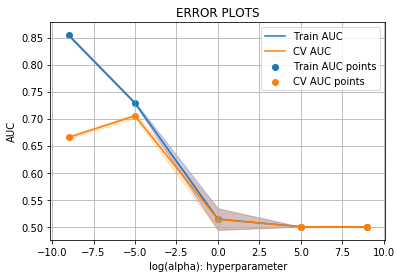

In [89]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
import math

neigh = SGDClassifier(loss='hinge', penalty='elasticnet', class_weight = 'balanced')
parameters = {'alpha':[10**-4, 10**-2, 10**0, 10**2, 10**4]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr_m1, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

alpha = [10**-4, 10**-2, 10**0, 10**2, 10**4]
para1 = [math.log(x) for x in alpha]
para1 = [round(x) for x in para1]
plt.plot(para1, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(para1,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(para1, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(para1,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(para1, train_auc, label='Train AUC points')
plt.scatter(para1, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [90]:
para1

[-9, -5, 0, 5, 9]

In [99]:
# from the error plot we choose log(alpha) such that, we will have maximum AUC on cv data and gap between the train and cv is less
# for log(alpha) = -5.0 we will have maximum AUC on cv data and for which corresponding alpha is 10**-2
best_alpha = 10**-2

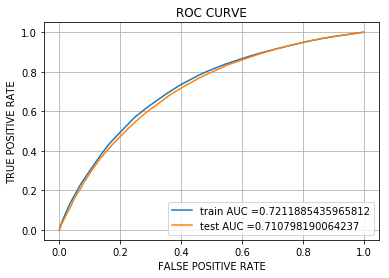

In [91]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.calibration import CalibratedClassifierCV

neigh = SGDClassifier(loss='hinge', penalty='elasticnet', alpha=10**-2, class_weight = 'balanced')
neigh.fit(X_tr_m1, y_train)
clf_calibrated = CalibratedClassifierCV(neigh, cv='prefit', method='isotonic')
clf_calibrated.fit(X_tr_m1, y_train)

y_train_pred = clf_calibrated.predict_proba(X_tr_m1)[:,1]    
y_test_pred = clf_calibrated.predict_proba(X_te_m1)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC CURVE")
plt.grid()
plt.show()

In [92]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24986765555925336 for threshold 0.786


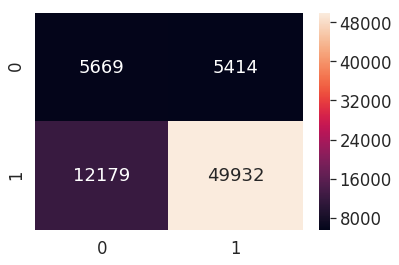

In [93]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
conf_mat_data = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
sns.set(font_scale = 1.5)
sns.heatmap(conf_mat_data, annot=True, fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24998851536312208 for threshold 0.691


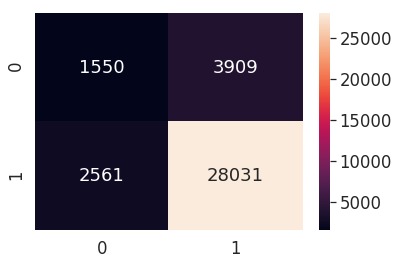

In [94]:
print("Test confusion matrix")
sns.set(font_scale = 1.5)
conf_mat_data = confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
sns.heatmap(conf_mat_data, annot=True, fmt='g')

<h3>2.4.2 Applying SVM on TFIDF(with bi-grams), SET 2</h3>

In [95]:
X_tr_m2 = csr_matrix(X_tr_m2)
X_te_m2 = csr_matrix(X_te_m2)

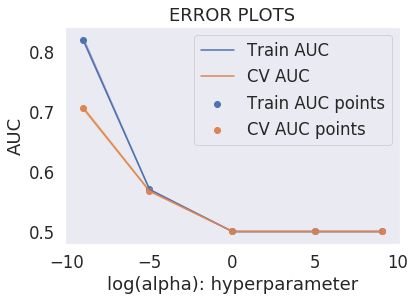

In [96]:
neigh = SGDClassifier(loss='hinge', penalty='elasticnet', class_weight = 'balanced')
parameters = {'alpha':[10**-4, 10**-2, 10**0, 10**2, 10**4]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr_m2, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

alpha = [10**-4, 10**-2, 10**0, 10**2, 10**4]
para1 = [math.log(x) for x in alpha]
para1 = [round(x) for x in para1]
plt.plot(para1, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(para1,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(para1, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(para1,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(para1, train_auc, label='Train AUC points')
plt.scatter(para1, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [97]:
para1

[-9, -5, 0, 5, 9]

In [98]:
# from the error plot we choose log(alpha) such that, we will have maximum AUC on cv data and gap between the train and cv is less
# for log(alpha) = -9.0 we will have maximum AUC on cv data and for which corresponding alpha is 10**-4
best_alpha = 10**-4

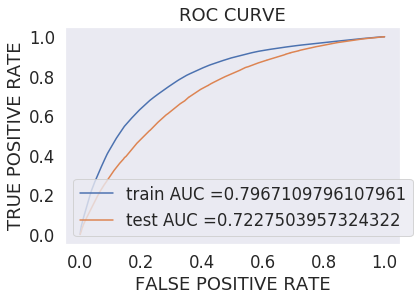

In [99]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = SGDClassifier(loss='hinge', penalty='elasticnet', alpha=10**-4, class_weight = 'balanced')
neigh.fit(X_tr_m2, y_train)
clf_calibrated = CalibratedClassifierCV(neigh, cv='prefit', method='isotonic')
clf_calibrated.fit(X_tr_m2, y_train)

y_train_pred = clf_calibrated.predict_proba(X_tr_m2)[:,1]    
y_test_pred = clf_calibrated.predict_proba(X_te_m2)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC CURVE")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999086360331393 for threshold 0.694


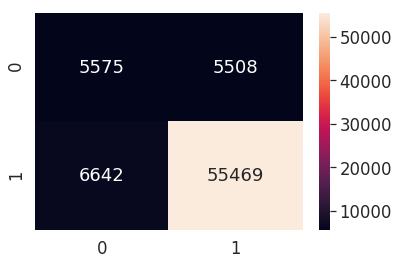

In [100]:
import seaborn as sns; sns.set()
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
conf_mat_data = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
sns.set(font_scale = 1.5)
sns.heatmap(conf_mat_data, annot=True, fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24946302401612902 for threshold 0.644


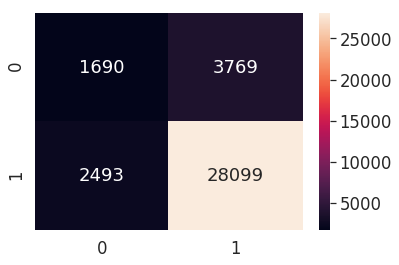

In [101]:
print("Test confusion matrix")
sns.set(font_scale = 1.5)
conf_mat_data = confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
sns.heatmap(conf_mat_data, annot=True, fmt='g')

<h3>2.4.3 Applying SVM on AVG W2V, SET 3</h3>

In [102]:
X_tr_m3 = csr_matrix(X_tr_m3)
X_te_m3 = csr_matrix(X_te_m3)

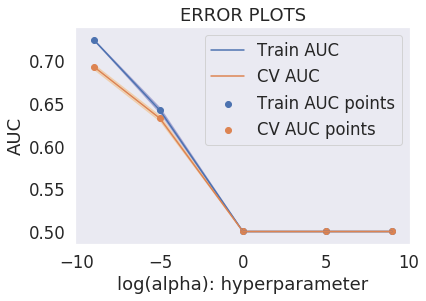

In [103]:
neigh = SGDClassifier(loss='hinge', penalty='elasticnet', class_weight = 'balanced')
parameters = {'alpha':[10**-4, 10**-2, 10**0, 10**2, 10**4]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr_m3, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

alpha = [10**-4, 10**-2, 10**0, 10**2, 10**4]
para1 = [math.log(x) for x in alpha]
para1 = [round(x) for x in para1]
plt.plot(para1, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(para1,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(para1, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(para1,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(para1, train_auc, label='Train AUC points')
plt.scatter(para1, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [104]:
para1

[-9, -5, 0, 5, 9]

In [105]:
# from the error plot we choose log(alpha) such that, we will have maximum AUC on cv data and gap between the train and cv is less
# for log(alpha) = -9.0 we will have maximum AUC on cv data and for which corresponding alpha is 10**-4
best_alpha = 10**-4

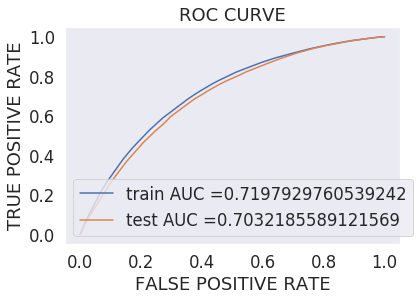

In [106]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = SGDClassifier(loss='hinge', penalty='elasticnet', alpha=10**-4, class_weight = 'balanced')
neigh.fit(X_tr_m3, y_train)
clf_calibrated = CalibratedClassifierCV(neigh, cv='prefit', method='isotonic')
clf_calibrated.fit(X_tr_m3, y_train)

y_train_pred = clf_calibrated.predict_proba(X_tr_m3)[:,1]    
y_test_pred = clf_calibrated.predict_proba(X_te_m3)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC CURVE")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24999828832488014 for threshold 0.806


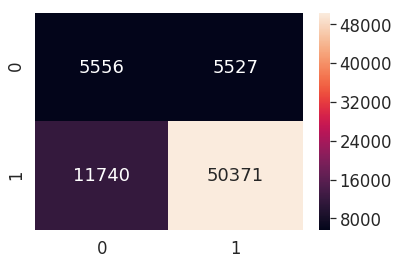

In [107]:
print("Train confusion matrix")
conf_mat_data = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
sns.set(font_scale = 1.5)
sns.heatmap(conf_mat_data, annot=True, fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2495523508338618 for threshold 0.739


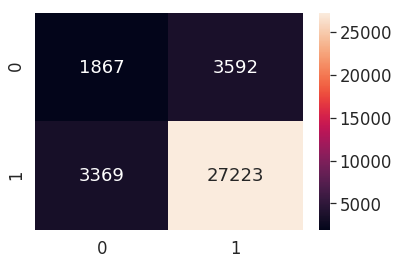

In [108]:
print("Test confusion matrix")
sns.set(font_scale = 1.5)
conf_mat_data = confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
sns.heatmap(conf_mat_data, annot=True, fmt='g')

<h3>2.4.4 Applying SVM on TFIDF W2V, SET 4</h3>

In [109]:
X_tr_m4 = csr_matrix(X_tr_m4)
X_te_m4 = csr_matrix(X_te_m4)

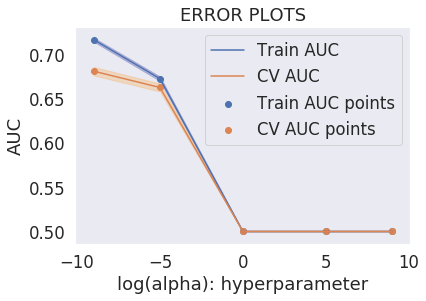

In [110]:
neigh = SGDClassifier(loss='hinge', penalty='elasticnet', class_weight = 'balanced')
parameters = {'alpha':[10**-4, 10**-2, 10**0, 10**2, 10**4]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr_m4, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

alpha = [10**-4, 10**-2, 10**0, 10**2, 10**4]
para1 = [math.log(x) for x in alpha]
para1 = [round(x) for x in para1]
plt.plot(para1, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(para1,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(para1, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(para1,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(para1, train_auc, label='Train AUC points')
plt.scatter(para1, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [111]:
para1

[-9, -5, 0, 5, 9]

In [112]:
# from the error plot we choose log(alpha) such that, we will have maximum AUC on cv data and gap between the train and cv is less
# for log(alpha) = -9.0 we will have maximum AUC on cv data and for which corresponding alpha is 10**-4
best_alpha = 10**-4

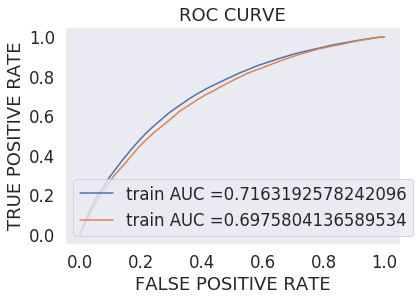

In [113]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = SGDClassifier(loss='hinge', penalty='elasticnet', alpha=10**-4, class_weight = 'balanced')
neigh.fit(X_tr_m4, y_train)
clf_calibrated = CalibratedClassifierCV(neigh, cv='prefit', method='isotonic')
clf_calibrated.fit(X_tr_m4, y_train)

y_train_pred = clf_calibrated.predict_proba(X_tr_m4)[:,1]    
y_test_pred = clf_calibrated.predict_proba(X_te_m4)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="train AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC CURVE")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2497347595561316 for threshold 0.804


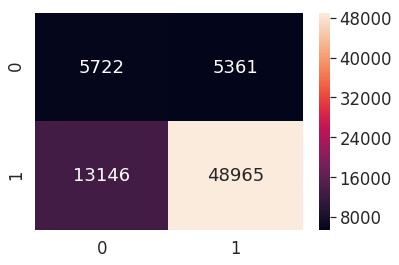

In [114]:
print("Train confusion matrix")
conf_mat_data = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
sns.set(font_scale = 1.5)
sns.heatmap(conf_mat_data, annot=True, fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24996878427039973 for threshold 0.664


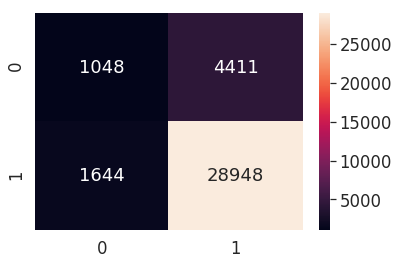

In [115]:
print("Test confusion matrix")
sns.set(font_scale = 1.5)
conf_mat_data = confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
sns.heatmap(conf_mat_data, annot=True, fmt='g')

<h2>2.5 Support Vector Machines with added Features `Set 5` </h2>

In [116]:
#Apply TruncatedSVD on TfidfVectorizer of essay text
from sklearn.decomposition import TruncatedSVD
#at one of the index value more than 80% variance will be preserved
index = [1000,1500,2000,2500,3000,3500,4000,4500]

for i in index:
    svd = TruncatedSVD(n_components=i)
    svd.fit(X_train_text_tfidf)
    var_explained = svd.explained_variance_ratio_.sum()
    if(var_explained>=0.8):
        break       
svd_train = svd.transform(X_train_text_tfidf)
svd_test = svd.transform(X_test_text_tfidf)

print(svd_train.shape, y_train.shape)
print(svd_test.shape, y_test.shape)
print("variance preserved at",i ,"dimensions is",var_explained)

(73194, 2000) (73194,)
(36051, 2000) (36051,)
variance preserved at 2000 dimensions is 0.8072804626773159


<h3>Concatinating all the features:set5</h3>

In [117]:
X_tr_m5 = hstack((svd_train, X_train_categories_ohe, X_train_sub_categories_ohe, X_train_teacher_ohe, X_train_state_ohe, X_train_grade_ohe, X_train_price_norm, X_train_quantity_norm, X_train_tnppp_norm, X_train_neg_norm, X_train_neu_norm, X_train_pos_norm, X_train_compound_norm, X_train_no_of_words_in_essay_norm, X_train_no_of_words_in_title_norm))

X_te_m5 = hstack((svd_test, X_test_categories_ohe, X_test_sub_categories_ohe, X_test_teacher_ohe, X_test_state_ohe, X_test_grade_ohe, X_test_price_norm, X_test_quantity_norm, X_test_tnppp_norm, X_test_neg_norm, X_test_neu_norm, X_test_pos_norm, X_test_compound_norm, X_test_no_of_words_in_essay_norm, X_test_no_of_words_in_title_norm))

print("Final Data matrix")
print(X_tr_m5.shape, y_train.shape)
print(X_te_m5.shape, y_test.shape)
print("="*100)

Final Data matrix
(73194, 2108) (73194,)
(36051, 2108) (36051,)


In [118]:
from scipy.sparse import hstack
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix

X_tr_m5 = csr_matrix(X_tr_m5)
X_te_m5 = csr_matrix(X_te_m5)

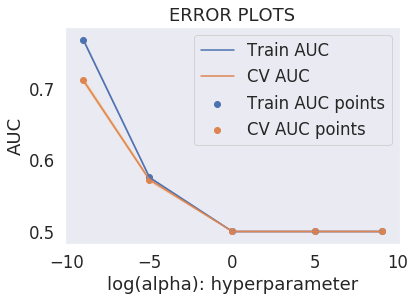

In [119]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import math

neigh = SGDClassifier(loss='hinge', penalty='elasticnet', class_weight = 'balanced')
parameters = {'alpha':[10**-4, 10**-2, 10**0, 10**2, 10**4]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc', return_train_score=True)
clf.fit(X_tr_m5, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']

alpha = [10**-4, 10**-2, 10**0, 10**2, 10**4]
para1 = [math.log(x) for x in alpha]
para1 = [round(x) for x in para1]
plt.plot(para1, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(para1,train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(para1, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
plt.gca().fill_between(para1,cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(para1, train_auc, label='Train AUC points')
plt.scatter(para1, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("log(alpha): hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [120]:
para1

[-9, -5, 0, 5, 9]

In [121]:
# from the error plot we choose log(alpha) such that, we will have maximum AUC on cv data and gap between the train and cv is less
# for log(alpha) = -9.0 we will have maximum AUC on cv data and for which corresponding alpha is 10**-2
best_alpha = 10**-4

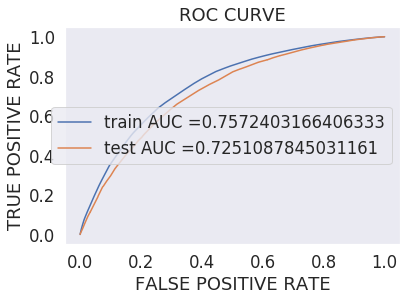

In [122]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = SGDClassifier(loss='hinge', penalty='elasticnet', alpha=10**-4, class_weight = 'balanced')
neigh.fit(X_tr_m5, y_train)
clf_calibrated = CalibratedClassifierCV(neigh, cv='prefit', method='isotonic')
clf_calibrated.fit(X_tr_m5, y_train)

y_train_pred = clf_calibrated.predict_proba(X_tr_m5)[:,1]    
y_test_pred = clf_calibrated.predict_proba(X_te_m5)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FALSE POSITIVE RATE")
plt.ylabel("TRUE POSITIVE RATE")
plt.title("ROC CURVE")
plt.grid()
plt.show()

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24996920816541243 for threshold 0.761


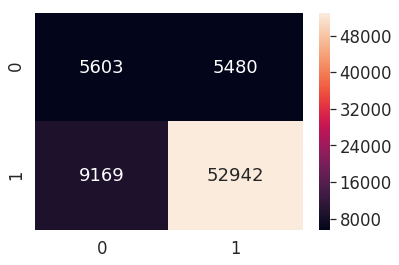

In [123]:
print("Train confusion matrix")
conf_mat_data = confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr))
sns.set(font_scale = 1.5)
sns.heatmap(conf_mat_data, annot=True, fmt='g')

Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24999932048532716 for threshold 0.722


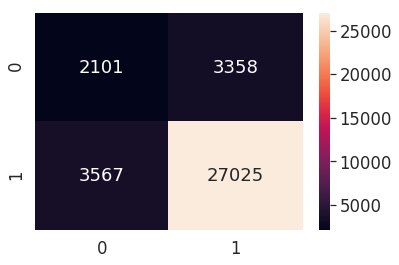

In [124]:
print("Test confusion matrix")
sns.set(font_scale = 1.5)
conf_mat_data = confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr))
sns.heatmap(conf_mat_data, annot=True, fmt='g')

<h1>3. Conclusion</h1>

In [126]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Vectorizer", "Model", "Hyper Parameter", "AUC"]

x.add_row(["set1(BOW)", "Linear SVM", 10**-4, 0.71])
x.add_row(["set2(TFIDF)", "Linear SVM", 10**-4, 0.72])
x.add_row(["set3(W2V)", "Linear SVM", 10**-4, 0.70])
x.add_row(["set4(TFIDFW2V)", "Linear SVM", 10**-4, 0.69])
x.add_row(["set5(added features)", "Linear SVM", 10**-4, 0.72])
print(x)

+----------------------+------------+-----------------+------+
|      Vectorizer      |   Model    | Hyper Parameter | AUC  |
+----------------------+------------+-----------------+------+
|      set1(BOW)       | Linear SVM |      0.0001     | 0.71 |
|     set2(TFIDF)      | Linear SVM |      0.0001     | 0.72 |
|      set3(W2V)       | Linear SVM |      0.0001     | 0.7  |
|    set4(TFIDFW2V)    | Linear SVM |      0.0001     | 0.69 |
| set5(added features) | Linear SVM |      0.0001     | 0.72 |
+----------------------+------------+-----------------+------+
